In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# plotting settings
# ensure all plots have white backgrounds and no transparent axes
plt.rcParams['axes.facecolor'] = 'white'


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['figure.titlesize'] = 19
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['errorbar.capsize'] = 3.0
# Update rcParams to hide top and right spines globally
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [50]:
# Parameters
num_steps = 500  # Number of steps in the random walk
dihedral_min = 0
dihedral_max = 360
center_angle = (dihedral_min + dihedral_max) / 2  # Center around 180 degrees

In [51]:
# Function to generate a random walk for a dihedral angle
def random_dihedral_walk(num_steps, min_angle, max_angle):
    walk = np.zeros(num_steps)
    walk[0] = np.random.uniform(min_angle, max_angle)  # Start at a random angle
    for i in range(1, num_steps):
        # Small random step, ensure wrap-around within the range 0 to 360 degrees
        step = np.random.uniform(-20, 20)  # Adjust step size for smoother transitions
        walk[i] = (walk[i-1] + step) % 360  # Use modulo to wrap between 0 and 360 degrees
    return walk

In [52]:
# Generate the random walk
np.random.seed(199106237)  # For reproducibility
dihedral_walk = random_dihedral_walk(num_steps, dihedral_min, dihedral_max)

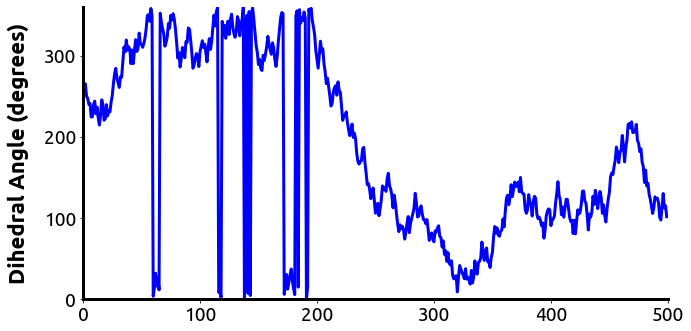

In [53]:
# Plotting
plt.figure(figsize=(10, 5))
time = np.arange(num_steps)

plt.plot(time, np.flip(dihedral_walk), color='blue')

# plt.xlabel('Time (steps)')
plt.ylabel('Dihedral Angle (degrees)')
# plt.title('Random Walk of a Dihedral Angle')
plt.ylim(0, 360)
plt.xlim(0, num_steps)
# plt.grid(True)
plt.tight_layout()
plt.savefig('figures/dihedral_walk.png',dpi=300)


In [54]:
# Function to assign structural states based on dihedral angle
def assign_structural_states(dihedral_walk):
    states = np.zeros(len(dihedral_walk), dtype=int)
    for i, angle in enumerate(dihedral_walk):
        if 0 <= angle < 120:
            states[i] = 1  # State 1: [0, 120)
        elif 120 <= angle < 240:
            states[i] = 2  # State 2: [120, 240)
        else:
            states[i] = 3  # State 3: [240, 360)
    return states

In [55]:
# Assign structural states based on dihedral values
structural_states = assign_structural_states(dihedral_walk)

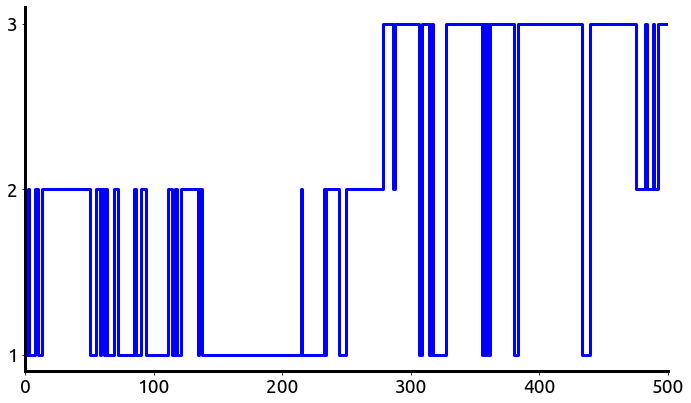

In [56]:
# Plotting the dihedral walk and structural states
plt.figure(figsize=(10, 6))
time = np.arange(num_steps)

# Plot the dihedral angle walk
# plt.plot(time, dihedral_walk, linewidth=1.5, color='blue', label='Dihedral Angle')

# Plot structural state assignments as a step plot
plt.step(time, structural_states, where='mid', color='blue', label='Structural State')


# plt.xlabel('Time (steps)')
# plt.ylabel('Structural States')
# Set y-axis to only integer values
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(0.9, 3.1)
plt.xlim(0,500)
plt.tight_layout()
plt.savefig('figures/structural_states.png',dpi=300)

In [57]:
# Function to assign dynamical states based on structural state transitions
def assign_dynamical_states(structural_states, window_size=5, threshold=3):
    dynamical_states = np.zeros(len(structural_states), dtype=int)
    
    # Sliding window to check for transitions
    for i in range(len(structural_states) - window_size):
        # Get the window of structural states
        window = structural_states[i:i + window_size]
        
        # Count the number of transitions (i.e., where state changes)
        transitions = np.sum(np.diff(window) != 0)
        
        # If the number of transitions in the window is >= threshold, assign dynamical state 1
        if transitions >= threshold:
            dynamical_states[i:i + window_size] = 1
    
    return dynamical_states


In [58]:
# Assign dynamical states based on structural state transitions
dynamical_states = assign_dynamical_states(structural_states)

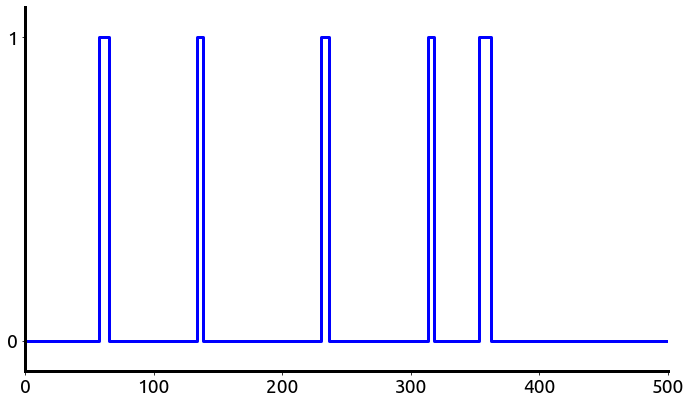

In [59]:
# Plotting the dihedral walk and structural states
plt.figure(figsize=(10, 6))
time = np.arange(num_steps)

# Plot the dihedral angle walk
# plt.plot(time, dihedral_walk, linewidth=1.5, color='blue', label='Dihedral Angle')

# Plot structural state assignments as a step plot
plt.step(time, dynamical_states, where='mid', color='blue', label='Structural State')


# plt.xlabel('Time (steps)')
# plt.ylabel('Structural States')
# Set y-axis to only integer values
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(-.1, 1.1)
plt.xlim(0,500)
plt.tight_layout()
plt.savefig('figures/dynamical_states.png',dpi=300)